In [34]:
import numpy as np
from datascience import *
import pandas as pd

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

In [35]:
sales = Table.read_table('businesslwithyear.csv')
sales

C:\Users\Betsy I George\anaconda3\Lib\site-packages\datascience\tables.py:163: DtypeWarning: Columns (0,1,2,3,8,9,10,11,12,13,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pandas.read_csv(filepath_or_buffer, *args, **vargs)


Game,Console,Publisher,Developer,VGChartz Score,Critic Score,User Score,Total Shipped,Total Sales,NA Sales,PAL Sales,Japan Sales,Other Sales,Release Date,Year,Last Update
Higurashi no Naku Koro ni Matsuri,PS2_b,Alchemist,07th Expansion,nan,nan,nan,nan,0.11m,nan,nan,0.11m,nan,22nd Feb 07,7,nan
Higurashi no Naku Koro ni Matsuri: Kakera Asobi,PS2_b,Alchemist,07th Expansion,nan,nan,nan,nan,0.07m,nan,nan,0.07m,nan,20th Dec 07,7,nan
School Days LxH,PS2_b,Interchannel,0verflow,nan,nan,nan,nan,0.02m,nan,nan,0.02m,nan,17th Jan 08,8,nan
Island Days,3DS_b,Stack,0verflow,nan,nan,nan,nan,0.00m,nan,nan,0.00m,nan,03rd Jul 14,14,01st May 19
Ready 2 Rumble Revolution,Wii_b,Atari,10tacle Studios AG,nan,3.1,nan,nan,0.16m,0.15m,0.00m,nan,0.01m,17th Mar 09,9,nan
Boulder Dash: Rocks!,DS_b,10TACLE Studios,10tacle Studios AG,nan,nan,nan,nan,0.03m,nan,0.03m,nan,0.00m,23rd Nov 07,7,nan
Men of War: Red Tide,PC_b,Aspyr,1C Company,nan,nan,nan,nan,0.00m,nan,0.00m,nan,0.00m,02nd Nov 09,9,29th Mar 19
Perimeter,PC_b,Codemasters,1C Company,nan,nan,nan,nan,0.00m,nan,0.00m,nan,0.00m,30th Jun 04,4,nan
4x4 Hummer,PC_b,Aspyr,1C Company / Avalon Style,nan,nan,nan,nan,0.00m,nan,0.00m,nan,0.00m,15th Jun 09,9,nan
IL-2 Sturmovik,PC_b,Ubisoft,1C Maddox Games,nan,nan,nan,nan,0.01m,nan,0.01m,nan,0.00m,18th Nov 01,1,nan


In [36]:
Japan_sales = sales.select('Console','Publisher','Developer','Japan Sales').where('Japan Sales', are.not_equal_to('nan'))
Japan_sales

Console,Publisher,Developer,Japan Sales
PS2_b,Alchemist,07th Expansion,0.11m
PS2_b,Alchemist,07th Expansion,0.07m
PS2_b,Interchannel,0verflow,0.02m
3DS_b,Stack,0verflow,0.00m
X360_b,2K Games,2K Australia / 2K Boston,0.05m
DS_b,3 O'Clock,3 O'Clock,0.03m
X360_b,Microsoft Studios,343 Industries,0.04m
XOne_b,Microsoft Studios,343 Industries,0.03m
X360_b,Microsoft Studios,343 Industries,0.04m
PS3_b,Bethesda Softworks,4J Studios,0.14m


In [37]:
def remove_unit(string):
    return string.replace('m','')
remove_unit('100m')

'100'

In [38]:
Japan_sales = Japan_sales.with_column('JapanSales' , Japan_sales.apply(remove_unit, 'Japan Sales').astype(float))
Japan_sales

Console,Publisher,Developer,Japan Sales,JapanSales
PS2_b,Alchemist,07th Expansion,0.11m,0.11
PS2_b,Alchemist,07th Expansion,0.07m,0.07
PS2_b,Interchannel,0verflow,0.02m,0.02
3DS_b,Stack,0verflow,0.00m,0
X360_b,2K Games,2K Australia / 2K Boston,0.05m,0.05
DS_b,3 O'Clock,3 O'Clock,0.03m,0.03
X360_b,Microsoft Studios,343 Industries,0.04m,0.04
XOne_b,Microsoft Studios,343 Industries,0.03m,0.03
X360_b,Microsoft Studios,343 Industries,0.04m,0.04
PS3_b,Bethesda Softworks,4J Studios,0.14m,0.14


Text(0.5, 1.0, 'Japan Sales In Millions')

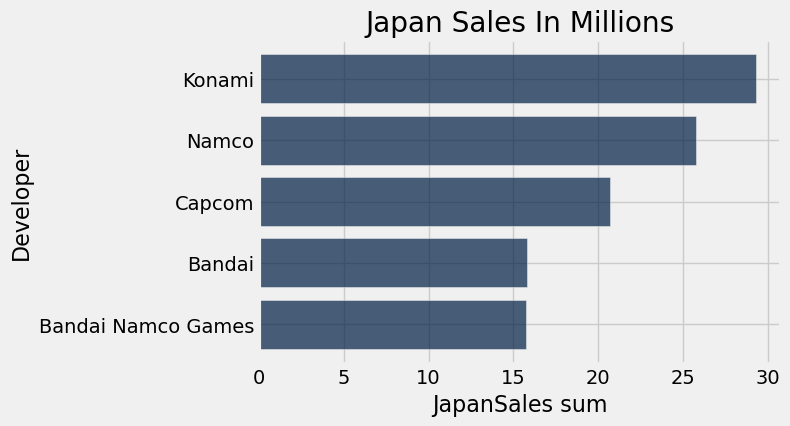

In [52]:
Japan_sales.select('Developer','JapanSales').group('Developer',sum).sort(1,descending = True).take(np.arange(5)).barh('Developer')
plt.title('Japan Sales In Millions')

In [53]:
NA_sales = sales.select('Console','Publisher','Developer','NA Sales').where('NA Sales', are.not_equal_to('nan'))
NA_sales

Console,Publisher,Developer,NA Sales
Wii_b,Atari,10tacle Studios AG,0.15m
PC_b,Paradox Interactive,1C:Ino-Co,0.04m
DS_b,GameMill,1st Playable,0.07m
DS_b,Disney Interactive Studios,1st Playable Productions,1.87m
DS_b,D3 Publisher,1st Playable Productions,0.68m
DS_b,Disney Interactive Studios,1st Playable Productions,1.12m
3DS_b,GameMill Entertainment,1st Playable Productions,0.32m
DS_b,Disney Interactive Studios,1st Playable Productions,0.39m
PSP_b,D3 Publisher,1st Playable Productions,0.13m
DS_b,Mentor Interactive,1st Playable Productions,0.37m


In [54]:
NA_sales = NA_sales.with_column('NASales' , NA_sales.apply(remove_unit, 'NA Sales').astype(float))
NA_sales

Console,Publisher,Developer,NA Sales,NASales
Wii_b,Atari,10tacle Studios AG,0.15m,0.15
PC_b,Paradox Interactive,1C:Ino-Co,0.04m,0.04
DS_b,GameMill,1st Playable,0.07m,0.07
DS_b,Disney Interactive Studios,1st Playable Productions,1.87m,1.87
DS_b,D3 Publisher,1st Playable Productions,0.68m,0.68
DS_b,Disney Interactive Studios,1st Playable Productions,1.12m,1.12
3DS_b,GameMill Entertainment,1st Playable Productions,0.32m,0.32
DS_b,Disney Interactive Studios,1st Playable Productions,0.39m,0.39
PSP_b,D3 Publisher,1st Playable Productions,0.13m,0.13
DS_b,Mentor Interactive,1st Playable Productions,0.37m,0.37


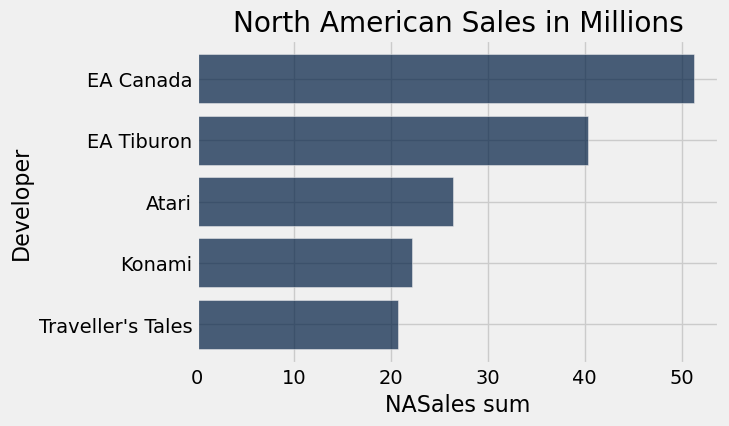

In [59]:
NA_sales.select('Developer','NASales').group('Developer',sum).sort(1,descending = True).take(np.arange(5)).barh('Developer')
plt.title('North American Sales in Millions');

In [60]:
PAL_sales = sales.select('Console','Publisher','Developer','PAL Sales').where('PAL Sales', are.not_equal_to('nan'))
PAL_sales

Console,Publisher,Developer,PAL Sales
Wii_b,Atari,10tacle Studios AG,0.00m
DS_b,10TACLE Studios,10tacle Studios AG,0.03m
PC_b,Aspyr,1C Company,0.00m
PC_b,Codemasters,1C Company,0.00m
PC_b,Aspyr,1C Company / Avalon Style,0.00m
PC_b,Ubisoft,1C Maddox Games,0.01m
PC_b,Ubisoft,1C: Maddox Games,0.05m
PC_b,Ubisoft,1C: Maddox Games,0.04m
PC_b,Ubisoft,1C: Maddox Games,0.02m
PC_b,Ubisoft,1C: Maddox Games,0.00m


In [61]:
PAL_sales = PAL_sales.with_column('PALSales' , PAL_sales.apply(remove_unit, 'PAL Sales').astype(float))
PAL_sales

Console,Publisher,Developer,PAL Sales,PALSales
Wii_b,Atari,10tacle Studios AG,0.00m,0
DS_b,10TACLE Studios,10tacle Studios AG,0.03m,0.03
PC_b,Aspyr,1C Company,0.00m,0
PC_b,Codemasters,1C Company,0.00m,0
PC_b,Aspyr,1C Company / Avalon Style,0.00m,0
PC_b,Ubisoft,1C Maddox Games,0.01m,0.01
PC_b,Ubisoft,1C: Maddox Games,0.05m,0.05
PC_b,Ubisoft,1C: Maddox Games,0.04m,0.04
PC_b,Ubisoft,1C: Maddox Games,0.02m,0.02
PC_b,Ubisoft,1C: Maddox Games,0.00m,0


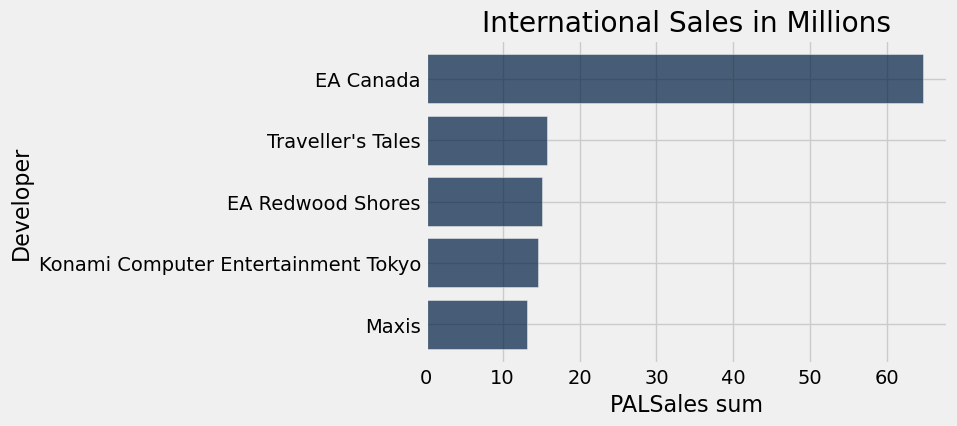

In [63]:
PAL_sales.select('Developer','PALSales').group('Developer',sum).sort(1,descending = True).take(np.arange(5)).barh('Developer')
plt.title('International Sales in Millions');